In [2]:
!pip install yfinance

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     --- ----------------------

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

plt.style.use('ggplot')


ticker = 'GOOGL'
data = yf.download(ticker, start='2022-01-01', end='2024-01-01')




print("--- Data Info ---")
print(data.info())
print("\n--- Summary Statistics ---")
print(data.describe())


data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12180\2965870204.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-01-03 to 2023-12-29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, GOOGL)   501 non-null    float64
 1   (High, GOOGL)    501 non-null    float64
 2   (Low, GOOGL)     501 non-null    float64
 3   (Open, GOOGL)    501 non-null    float64
 4   (Volume, GOOGL)  501 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.5 KB
None

--- Summary Statistics ---
Price        Close        High         Low        Open        Volume
Ticker       GOOGL       GOOGL       GOOGL       GOOGL         GOOGL
count   501.000000  501.000000  501.000000  501.000000  5.010000e+02
mean    115.973638  117.445530  114.512387  115.910831  3.375026e+07
std      16.137283   16.232256   16.093869   16.245664  1.345302e+07
min      82.858513   85.927343   82.769125   84.815029  9.701400e+06
25%     102.195145  103.178370  100.526

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2022-01-03,143.998337,144.851946,142.728591,144.061394,28646000
2022-01-04,143.410385,145.481595,142.732065,144.400050,28400000
2022-01-05,136.831238,143.509678,136.744843,143.430724,54618000
2022-01-06,136.803940,138.981426,135.623089,136.060077,37348000
2022-01-07,136.078445,137.500143,134.836508,137.199210,29760000


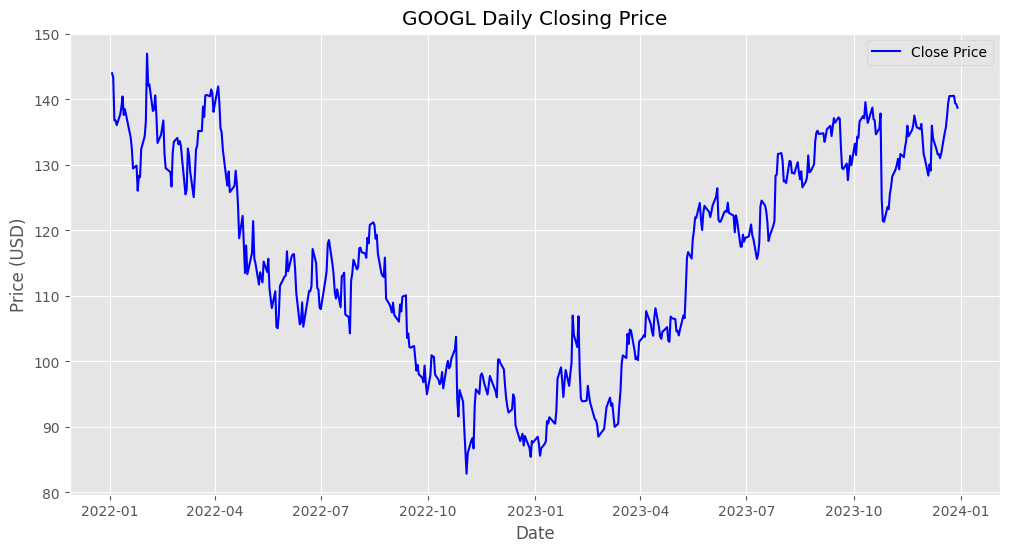

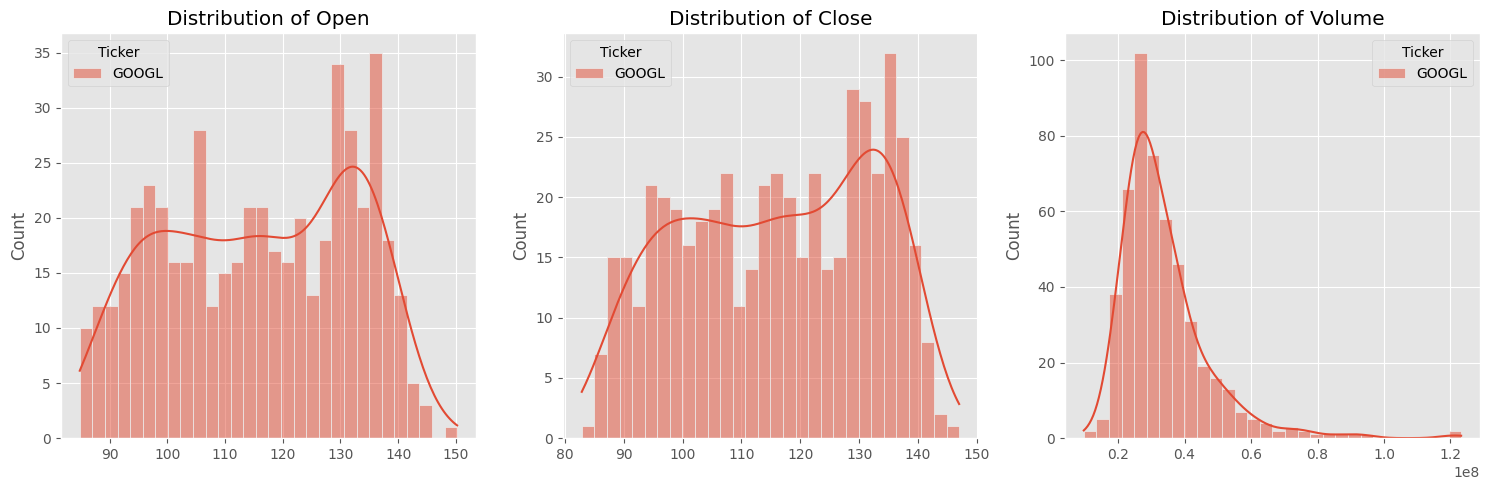

In [4]:

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.title(f'{ticker} Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

features = ['Open', 'Close', 'Volume']
plt.figure(figsize=(15, 5))

for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

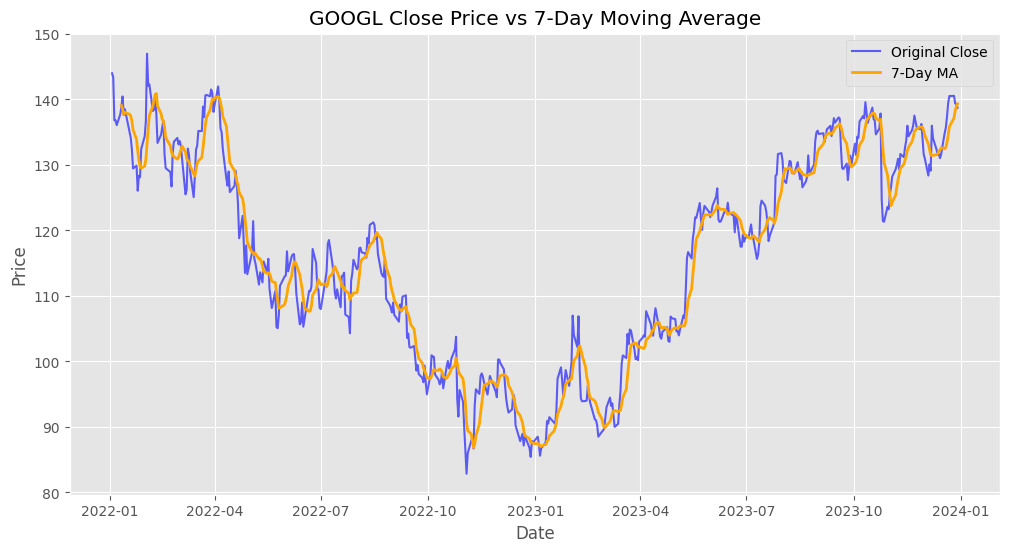

In [5]:

data['Close_MA7'] = data['Close'].rolling(window=7).mean()


plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Original Close', alpha=0.6, color='blue')
plt.plot(data.index, data['Close_MA7'], label='7-Day MA', color='orange', linewidth=2)

plt.title(f'{ticker} Close Price vs 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [7]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 501.1 kB/s eta 0:00:19
   -- ------------------------------------- 0.5/9.6 MB 501.1 kB/s eta 0:00:19
   --- ------------------------------------ 0.8/9.6 MB 478.0 kB/s eta 0:00:19
   --- ------------------------------------ 0.8/9.6 MB 478.0 kB/s eta 0:00:19
   --- ------------------------------------ 0.8/9.6 MB 478.0 kB/s eta 0:00:19
   ---- ----------------------------------- 1.0/9.6 MB 454

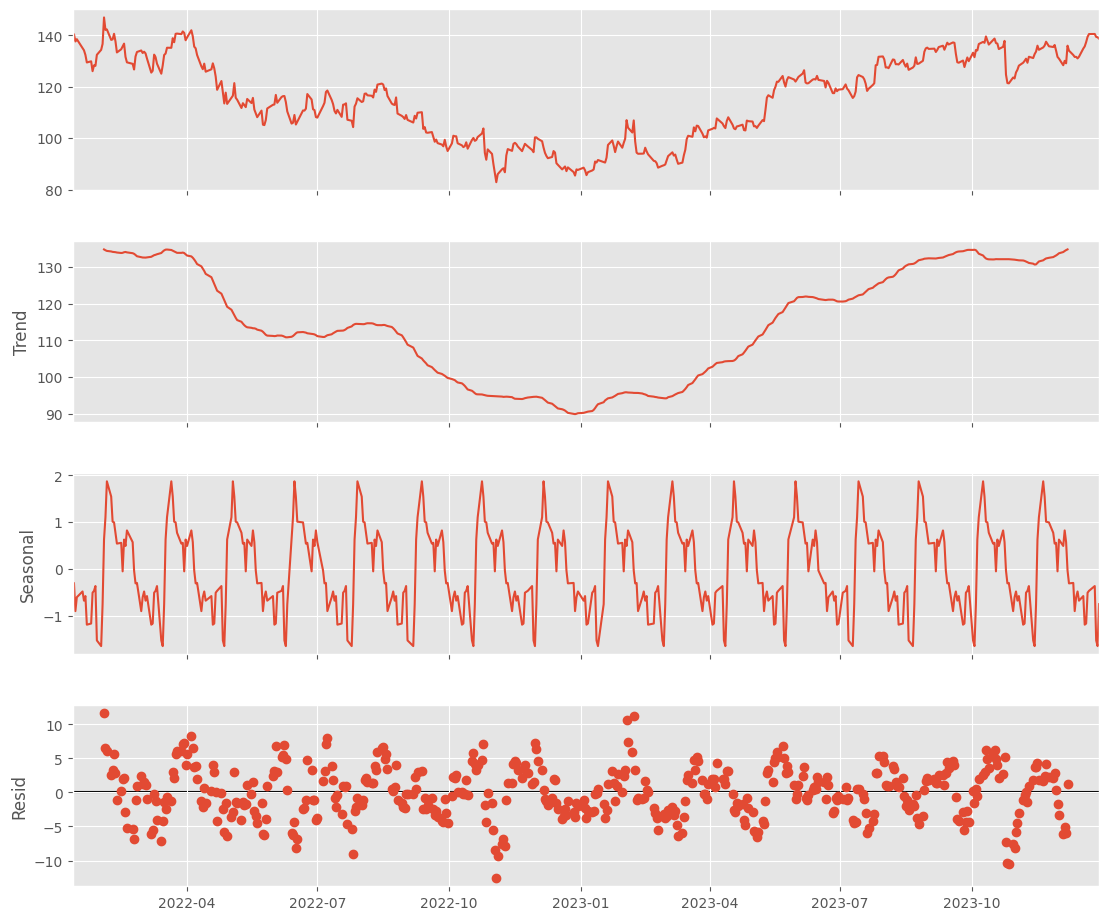

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose


df_clean = data.dropna()


decomposition = seasonal_decompose(df_clean['Close'], model='additive', period=30)

# Plot the components
fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(data['Close'].dropna())

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

# Interpretation
if result[1] < 0.05:
    print("\nResult: The time series is Stationary (p < 0.05).")
else:
    print("\nResult: The time series is Non-Stationary (p > 0.05).")

ADF Statistic: -1.8880180383991847
p-value: 0.3377186275883063
Critical Values:
	1%: -3.443496379464
	5%: -2.8673378563200003
	10%: -2.569858036

Result: The time series is Non-Stationary (p > 0.05).


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is availab

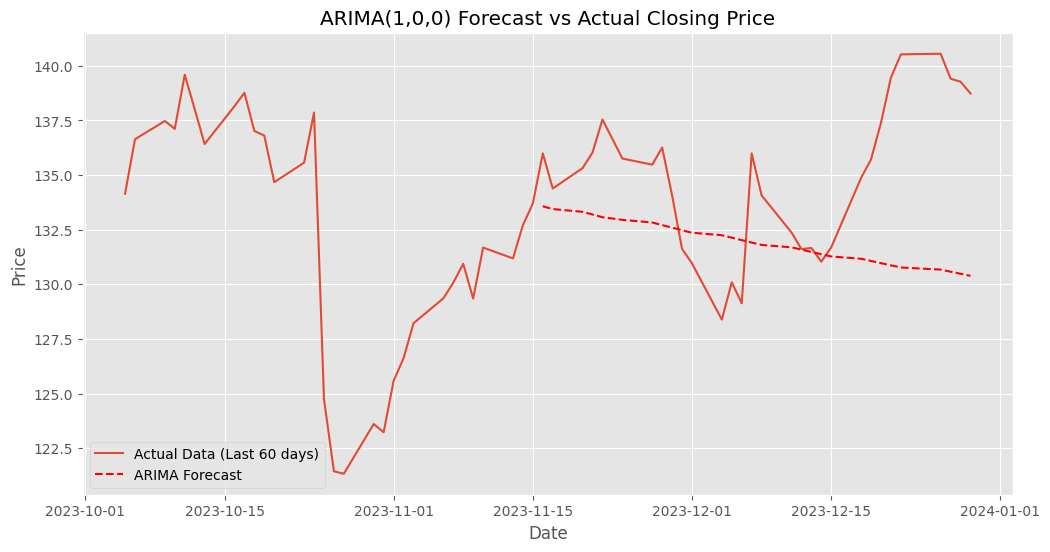


Mean Absolute Error (MAE): 3.7049

--- Model Performance Commentary ---
The MAE is 3.70, meaning on average the forecast is off by $3.70.
Critique: Stock prices are usually Non-Stationary (they have trends).
Using d=0 in ARIMA(1,0,0) assumes the data is stationary, which is likely incorrect for stock prices.
This often leads to 'underfitting', where the model simply predicts the mean or the previous value without capturing the trend.
A better approach would be ARIMA(1,1,0) or (1,1,1) to account for differencing.


In [10]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error


train_data = data['Close'][:-30]
test_data = data['Close'][-30:]

model = ARIMA(train_data, order=(1, 0, 0))
model_fit = model.fit()

forecast_result = model_fit.get_forecast(steps=30)
forecast_values = forecast_result.predicted_mean
forecast_index = test_data.index  

plt.figure(figsize=(12, 6))
plt.plot(data.index[-60:], data['Close'][-60:], label='Actual Data (Last 60 days)')
plt.plot(forecast_index, forecast_values, label='ARIMA Forecast', color='red', linestyle='--')
plt.title('ARIMA(1,0,0) Forecast vs Actual Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


mae = mean_absolute_error(test_data, forecast_values)
print(f"\nMean Absolute Error (MAE): {mae:.4f}")


print("\n--- Model Performance Commentary ---")
print(f"The MAE is {mae:.2f}, meaning on average the forecast is off by ${mae:.2f}.")
print("Critique: Stock prices are usually Non-Stationary (they have trends).")
print("Using d=0 in ARIMA(1,0,0) assumes the data is stationary, which is likely incorrect for stock prices.")
print("This often leads to 'underfitting', where the model simply predicts the mean or the previous value without capturing the trend.")
print("A better approach would be ARIMA(1,1,0) or (1,1,1) to account for differencing.")

### Report:

The forecast produced by the ARIMA(1, 0, 0) model is not reasonable, and the model is currently underfitting the data. By setting the differencing parameter d to 0, the model incorrectly assumes that stock prices are stationary (hovering around a constant average), whereas real stock data possesses dynamic trends and fluctuating means. Consequently, the model fails to capture the actual market momentum, likely resulting in a forecast that looks like a flat line or a slow return to the historical average, effectively ignoring the stock's trajectory. To correct this, the model requires differencing (setting d=1) so it can learn from day-to-day price changes rather than raw values.